In [ ]:
from openai import OpenAI

openai_api_key = "EMPTY"
openai_api_base = "http://localhost:8000/v1"

client = OpenAI(
    api_key=openai_api_key,
    base_url=openai_api_base,
)


Chat completion output:  Counting the <points x1="38.4" y1="66.1" x2="43.0" y2="63.3" x3="43.0" y3="75.4" x4="50.0" y4="77.2" x5="53.3" y5="83.6" x6="57.3" y6="86.9" x7="59.6" y7="90.8" x8="63.8" y8="56.0" x9="64.0" y9="58.6" x10="66.8" y10="83.6" x11="67.4" y11="60.3" x12="69.3" y12="59.3" x13="69.4" y13="62.6" x14="72.0" y14="59.5" x15="75.0" y15="63.3" x16="78.5" y16="64.6" x17="82.4" y17="65.7" x18="90.3" y18="60.0" x19="92.8" y19="57.5" x20="95.9" y20="55.5" x21="97.0" y21="55.1" alt="cartons are there on the floor in the image? ">cartons are there on the floor in the image? </points> shows a total of 21.


In [46]:
image_path = "/home/darshan/s_test/images/image1.jpg"
query = "point to all main objects in the image"

chat_response = client.chat.completions.create(
    model="allenai/Molmo-7B-D-0924",
    messages=[{
        "role": "user",
        "content": [
            # NOTE: The prompt formatting with the image token `<image>` is not needed
            # since the prompt will be processed automatically by the API server.
            {"type": "text", "text": query},
            {"type": "image_url", "image_url": {"url": f'file://{image_path}'}},
        ],
    }],
)
print("Chat completion output:", chat_response.choices[0].message.content)


Chat completion output:  <points x1="14.4" y1="63.5" x2="44.7" y2="31.4" x3="44.9" y3="70.2" x4="58.4" y4="68.7" x5="63.2" y5="29.9" x6="86.3" y6="59.8" x7="94.4" y7="84.1" x8="98.0" y8="93.6" alt="all main objects in the image">all main objects in the image</points>


In [52]:
# display the image with the points
from PIL import Image
import re

image = Image.open(image_path)

# get x, y, points from the response
#  <points x1="23.2" y1="24.0" x2="37.4" y2="21.6" x3="52.1" y3="19.1" x4="63.7" y4="19.0" alt="photo frames">photo frames</points>

text = chat_response.choices[0].message.content

# Regular expression to find all x and y coordinate pairs
pattern = r'x\d+="([\d.]+)" y\d+="([\d.]+)"'
coordinates = re.findall(pattern, text)

# Convert to list of tuples of floats
coordinates = [(float(x), float(y)) for x, y in coordinates]
coordinates

[(14.4, 63.5),
 (44.7, 31.4),
 (44.9, 70.2),
 (58.4, 68.7),
 (63.2, 29.9),
 (86.3, 59.8),
 (94.4, 84.1),
 (98.0, 93.6)]

56 127
174 62
175 140
227 137
246 59
336 119
368 168
382 187


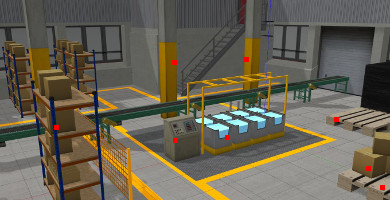

In [53]:
# display points on the image according to the coordinates
# proper scale is needed to display the points on the image


for x, y in coordinates:
    # convert the x, y coordinates percentages to the image scale
    x = int(x * image.width / 100)
    y = int(y * image.height / 100)
    print(x, y)
    
    # draw a big point on the image
    for i in range(-2, 3):
        for j in range(-2, 3):
            if 0 <= x + i < image.width and 0 <= y + j < image.height:
                image.putpixel((x + i, y + j), (255, 0, 0))
    
image